In [211]:
import numpy as np
import pandas as pd
import warnings
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
data = load_breast_cancer()
data.keys() 

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [213]:
#print("Infromation of data: ",data.DESCR)
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [214]:
df = pd.DataFrame(data=data.data)

In [215]:
columns_list = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']
df.columns = columns_list

In [216]:
df['Target'] = data.target

In [217]:
print("Print Sum of Missing Values: ",df.isnull().sum().sum())

Print Sum of Missing Values:  0


In [218]:
print("How Many Percentage Missing Values: {}% ".format(df.isnull().sum().sum() / df.shape[0]*100))

How Many Percentage Missing Values: 0.0% 


In [219]:
df.shape


(569, 31)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


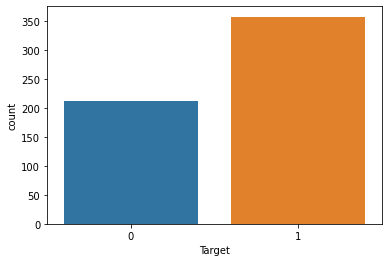

In [220]:
df['Target'].value_counts()
sns.countplot(df['Target'],label='Count',hue_order=[1,0])

In [221]:
x = df.iloc[:,0:30]
y = df['Target']

In [222]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [224]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)
y_pred = lr.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [225]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test,y_pred)
cn

array([[ 61,   2],
       [  5, 103]])

In [226]:
accuracy = (61+103)/(61+2+5+103) #formula=(tp+tn) / (tp+tn+fp+fn)
Error_rate = (1+2) / (60+1+0+108) #formula = (fp+fn) / (tp+tn+fp+fn) or (type-I+typeII)/(tp+tn+fp+fn)
print("Accuracy of these model is: ",acc)
print("Error rate of these model is: ",Error_rate)

Accuracy of these model is:  0.9590643274853801
Error rate of these model is:  0.01775147928994083


In [227]:
# compare actual_data & Predicted Data
Compare_y = pd.DataFrame(np.c_[y_pred,y_test],columns=['Predicted data','Actual data'])

In [228]:
# Second way
# Now I can use Standardscalar for impore more accuarcy.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_s = sc.transform(x_train)
x_test_s = sc.transform(x_test)

# StandardScaler return 2d-array data so convert into dataframe
x_train_sc = pd.DataFrame(x_train_s, columns = columns_list)
x_test_sc = pd.DataFrame(x_test_s, columns = columns_list)

In [229]:
from sklearn.linear_model import LogisticRegression 
lrs = LogisticRegression()
lrs.fit(x_train_sc,y_train)
lrs.score(x_test_sc,y_test)
y_pred = lrs.predict(x_test_sc)

In [230]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test,y_pred)
cn

array([[ 60,   3],
       [  1, 107]])

In [231]:
accuracy = (60+107)/(67+3+1+107) #formula=(tp+tn) / (tp+tn+fp+fn)
Error_rate = (3+1) / (67+3+1+107) #formula = (fp+fn) / (tp+tn+fp+fn) or (type-I+typeII)/(tp+tn+fp+fn)
print("Accuracy of these model is: ",acc)
print("Error rate of these model is: ",Error_rate)

Accuracy of these model is:  0.9590643274853801
Error rate of these model is:  0.02247191011235955
